# Micro-credit Analysis

In [238]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Importing the basic libraries for analysis:-
#Numpy,Pandas for data analysis
#Seaborn and Matplotlib for visualization
#Warnings to ignore the basic version changes

In [239]:
df=pd.read_csv('Micro-Credit.csv')
df.head()

t  label       msisdn    aon  daily_decr30  daily_decr90  rental30  \
0  1      0  21408I70789  272.0   3055.050000   3065.150000    220.13   
1  2      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   
2  3      1  17943I70372  535.0   1398.000000   1398.000000    900.13   
3  4      1  55773I70781  241.0     21.228000     21.228000    159.42   
4  5      1  03813I82730  947.0    150.619333    150.619333   1098.90   

   rental90  last_rech_date_ma  last_rech_date_da  ...  maxamnt_loans30  \
0    260.13                2.0                0.0  ...              6.0   
1   3691.26               20.0                0.0  ...             12.0   
2    900.13                3.0                0.0  ...              6.0   
3    159.42               41.0                0.0  ...              6.0   
4   1098.90                4.0                0.0  ...              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  pcircle       pdate  
0                 0.0  29.000000  29.000000      UPW  20-07-2016  
1                 0.0   0.000000   0.000000      UPW  10-08-2016  
2                 0.0   0.000000   0.000000      UPW  19-08-2016  
3                 0.0   0.000000   0.000000      UPW  06-06-2016  
4                 0.0   2.333333   2.333333      UPW  22-06-2016  

[5 rows x 37 columns]

In [ ]:
#Reading the file through Pandas

In [240]:
df.shape

(209593, 37)

In [ ]:
#There are 209593 rows and 37 columns

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   t                     209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [ ]:
# No null values and the data type of each column

In [ ]:
#Each column description

In [243]:
"""
label	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
msisdn	mobile number of user
aon	age on cellular network in days
daily_decr30	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
daily_decr90	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
rental30	Average main account balance over last 30 days
rental90	Average main account balance over last 90 days
last_rech_date_ma	Number of days till last recharge of main account
last_rech_date_da	Number of days till last recharge of data account
last_rech_amt_ma	Amount of last recharge of main account (in Indonesian Rupiah)
cnt_ma_rech30	Number of times main account got recharged in last 30 days
fr_ma_rech30	Frequency of main account recharged in last 30 days
sumamnt_ma_rech30	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
medianamnt_ma_rech30	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
medianmarechprebal30	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
cnt_ma_rech90	Number of times main account got recharged in last 90 days
fr_ma_rech90	Frequency of main account recharged in last 90 days
sumamnt_ma_rech90	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
medianamnt_ma_rech90	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
medianmarechprebal90	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
cnt_da_rech30	Number of times data account got recharged in last 30 days
fr_da_rech30	Frequency of data account recharged in last 30 days
cnt_da_rech90	Number of times data account got recharged in last 90 days
fr_da_rech90	Frequency of data account recharged in last 90 days
cnt_loans30	Number of loans taken by user in last 30 days
amnt_loans30	Total amount of loans taken by user in last 30 days
maxamnt_loans30	maximum amount of loan taken by the user in last 30 days
medianamnt_loans30	Median of amounts of loan taken by the user in last 30 days
cnt_loans90	Number of loans taken by user in last 90 days
amnt_loans90	Total amount of loans taken by user in last 90 days
maxamnt_loans90	maximum amount of loan taken by the user in last 90 days
medianamnt_loans90	Median of amounts of loan taken by the user in last 90 days
payback30	Average payback time in days over last 30 days
payback90	Average payback time in days over last 90 days
pcircle	telecom circle
pdate	date
"""

'\nVariable\tDefinition\nlabel\tFlag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}\nmsisdn\tmobile number of user\naon\tage on cellular network in days\ndaily_decr30\tDaily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)\ndaily_decr90\tDaily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)\nrental30\tAverage main account balance over last 30 days\nrental90\tAverage main account balance over last 90 days\nlast_rech_date_ma\tNumber of days till last recharge of main account\nlast_rech_date_da\tNumber of days till last recharge of data account\nlast_rech_amt_ma\tAmount of last recharge of main account (in Indonesian Rupiah)\ncnt_ma_rech30\tNumber of times main account got recharged in last 30 days\nfr_ma_rech30\tFrequency of main account recharged in last 30 days\nsumamnt_ma_rech30\tTotal amount of recharge in main account over last 30 days (in Indonesian Ru

In [244]:
df['pdate'].unique()

array(['20-07-2016', '10-08-2016', '19-08-2016', '06-06-2016',
       '22-06-2016', '02-07-2016', '05-07-2016', '05-08-2016',
       '15-06-2016', '08-06-2016', '12-06-2016', '20-06-2016',
       '29-06-2016', '16-06-2016', '03-08-2016', '24-06-2016',
       '04-07-2016', '03-07-2016', '01-07-2016', '08-08-2016',
       '26-06-2016', '23-06-2016', '06-07-2016', '09-07-2016',
       '10-06-2016', '07-06-2016', '27-06-2016', '11-08-2016',
       '30-06-2016', '19-06-2016', '26-07-2016', '14-08-2016',
       '14-06-2016', '21-06-2016', '25-06-2016', '28-06-2016',
       '11-06-2016', '27-07-2016', '23-07-2016', '16-08-2016',
       '15-08-2016', '02-06-2016', '05-06-2016', '02-08-2016',
       '28-07-2016', '18-07-2016', '18-08-2016', '16-07-2016',
       '29-07-2016', '21-07-2016', '03-06-2016', '13-06-2016',
       '01-08-2016', '13-07-2016', '10-07-2016', '09-06-2016',
       '15-07-2016', '11-07-2016', '09-08-2016', '12-08-2016',
       '22-07-2016', '04-06-2016', '24-07-2016', '18-06

In [ ]:
#checking the date range and splitting the date into day, month and year for better accuracy

In [245]:
df['Date'] = pd.to_numeric(df.pdate.str.replace('-','').str.slice(0,2))
print(df['Date'])

0         20
1         10
2         19
3          6
4         22
          ..
209588    17
209589    12
209590    29
209591    25
209592     7
Name: Date, Length: 209593, dtype: int64


In [246]:
df['Date'].unique()

array([20, 10, 19,  6, 22,  2,  5, 15,  8, 12, 29, 16,  3, 24,  4,  1, 26,
       23,  9,  7, 27, 11, 30, 14, 21, 25, 28, 18, 13, 17, 31],
      dtype=int64)

In [ ]:
#Unique date ranges

In [247]:
import datetime

In [248]:
df['pdate']=pd.to_datetime(df['pdate'])

In [249]:
df['Month']=df['pdate'].dt.month
df['Month'].unique()

array([ 7, 10,  8,  6,  2,  5, 12,  3,  4,  1,  9, 11], dtype=int64)

In [ ]:
#months description

In [250]:
df['Year']=df['pdate'].dt.year
df['Year'].unique()


array([2016], dtype=int64)

In [251]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [253]:
le=LabelEncoder()
df['pcircle']=le.fit_transform(df['pcircle'])

In [254]:
#Converted 'UPW' of pcircle through LabelEncoder

t  label       msisdn    aon  daily_decr30  daily_decr90  rental30  \
0  1      0  21408I70789  272.0   3055.050000   3065.150000    220.13   
1  2      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   
2  3      1  17943I70372  535.0   1398.000000   1398.000000    900.13   
3  4      1  55773I70781  241.0     21.228000     21.228000    159.42   
4  5      1  03813I82730  947.0    150.619333    150.619333   1098.90   

   rental90  last_rech_date_ma  last_rech_date_da  ...  amnt_loans90  \
0    260.13                2.0                0.0  ...            12   
1   3691.26               20.0                0.0  ...            12   
2    900.13                3.0                0.0  ...             6   
3    159.42               41.0                0.0  ...            12   
4   1098.90                4.0                0.0  ...            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000        0   
1               12                 0.0   0.000000   0.000000        0   
2                6                 0.0   0.000000   0.000000        0   
3                6                 0.0   0.000000   0.000000        0   
4                6                 0.0   2.333333   2.333333        0   

       pdate  Date  Month  Year  
0 2016-07-20    20      7  2016  
1 2016-10-08    10     10  2016  
2 2016-08-19    19      8  2016  
3 2016-06-06     6      6  2016  
4 2016-06-22    22      6  2016  

[5 rows x 40 columns]

In [256]:
dfcor=df.corr()
dfcor

t     label       aon  daily_decr30  \
t                     1.000000  0.000403 -0.002048      0.002739   
label                 0.000403  1.000000 -0.003785      0.168298   
aon                  -0.002048 -0.003785  1.000000      0.001104   
daily_decr30          0.002739  0.168298  0.001104      1.000000   
daily_decr90          0.003077  0.166150  0.000374      0.977704   
rental30             -0.003906  0.058085 -0.000960      0.442066   
rental90             -0.003459  0.075521 -0.000790      0.458977   
last_rech_date_ma    -0.001853  0.003728  0.001692      0.000487   
last_rech_date_da    -0.001133  0.001711 -0.001693     -0.001636   
last_rech_amt_ma     -0.001064  0.131804  0.004256      0.275837   
cnt_ma_rech30         0.003320  0.237331 -0.003148      0.451385   
fr_ma_rech30          0.003181  0.001330 -0.001163     -0.000577   
sumamnt_ma_rech30     0.000123  0.202828  0.000707      0.636536   
medianamnt_ma_rech30 -0.001371  0.141490  0.004306      0.295356   
medianmarechprebal30  0.001258 -0.004829  0.003930     -0.001153   
cnt_ma_rech90         0.002329  0.236392 -0.002725      0.587338   
fr_ma_rech90         -0.000249  0.084385  0.004401     -0.078299   
sumamnt_ma_rech90     0.000523  0.205793  0.001011      0.762981   
medianamnt_ma_rech90 -0.000298  0.120855  0.004909      0.257847   
medianmarechprebal90 -0.001947  0.039300 -0.000859      0.037495   
cnt_da_rech30         0.000888  0.003827  0.001564      0.000700   
fr_da_rech30         -0.002504 -0.000027  0.000892     -0.001499   
cnt_da_rech90        -0.001324  0.002999  0.001121      0.038814   
fr_da_rech90         -0.002827 -0.005418  0.005395      0.020673   
cnt_loans30           0.001725  0.196283 -0.001826      0.366116   
amnt_loans30          0.002387  0.197272 -0.001726      0.471492   
maxamnt_loans30       0.000698  0.000248 -0.002764     -0.000028   
medianamnt_loans30   -0.002005  0.044589  0.004664     -0.011610   
cnt_loans90           0.002241  0.004733 -0.000611      0.008962   
amnt_loans90          0.000781  0.199788 -0.002319      0.563496   
maxamnt_loans90       0.001742  0.084144 -0.001191      0.400199   
medianamnt_loans90   -0.002615  0.035747  0.002771     -0.037305   
payback30            -0.000040  0.048336  0.001940      0.026915   
payback90             0.002411  0.049183  0.002203      0.047175   
pcircle                    NaN       NaN       NaN           NaN   
Date                 -0.002045  0.006825  0.000662      0.006477   
Month                 0.001825  0.005093  0.000906      0.101704   
Year                       NaN       NaN       NaN           NaN   

                      daily_decr90  rental30  rental90  last_rech_date_ma  \
t                         0.003077 -0.003906 -0.003459          -0.001853   
label                     0.166150  0.058085  0.075521           0.003728   
aon                       0.000374 -0.000960 -0.000790           0.001692   
daily_decr30              0.977704  0.442066  0.458977           0.000487   
daily_decr90              1.000000  0.434685  0.471730           0.000908   
rental30                  0.434685  1.000000  0.955237          -0.001095   
rental90                  0.471730  0.955237  1.000000          -0.001688   
last_rech_date_ma         0.000908 -0.001095 -0.001688           1.000000   
last_rech_date_da        -0.001886  0.003261  0.002794           0.001790   
last_rech_amt_ma          0.264131  0.127271  0.121416          -0.000147   
cnt_ma_rech30             0.426707  0.233343  0.230260           0.004311   
fr_ma_rech30             -0.000343 -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30         0.603886  0.272649  0.259709           0.002105   
medianamnt_ma_rech30      0.282960  0.129853  0.120242          -0.001358   
medianmarechprebal30     -0.000746 -0.001415 -0.001237           0.004071   
cnt_ma_rech90             0.593069  0.312118  0.345293           0.004263   
fr_ma_rech90             -0.079530 -0.033530 -0.036524           0.

In [ ]:
#Year,pcircle dropped as there is only one value
#t is the serial no which does not contribute much to the dataset
#'pdate'- have derived data from the column separtely
#,'msisdn'- has no direct relationship in terms of whether would be defaulter or not

In [257]:
col=['pcircle','Year','t','pdate','msisdn']
df.drop(col,axis=1,inplace=True)

In [ ]:
#Dropped the data

In [258]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  Date  Month  
0                6                 0.0  29.000000  29.000000    20      7  
1               12                 0.0   0.000000   0.000000    10     10  
2                6                 0.0   0.000000   0.000000    19      8  
3                6                 0.0   0.000000   0.000000     6      6  
4                6                 0.0   2.333333   2.333333    22      6  

[5 rows x 35 columns]

In [259]:
df.shape

(209593, 35)

In [ ]:
#checking the new shape- 209593 rows and 35 columns

In [260]:
dfcorr=df.corr()
dfcorr

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   
Date                  0.006825  0.000662      0.006477     -0.021508   
Month                 0.005093  0.000906      0.101704      0.122772   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002345          -0.003626   
cnt_da_rech90         0.072255  0.056282      

In [ ]:
#label has good correlation with the following columns
#Positive correlation - daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech90,medianamnt_ma_rech30,cnt_loans30
#amnt_loans30,amnt_loans90

Text(0.5, 1.0, 'Correlation with target variable')

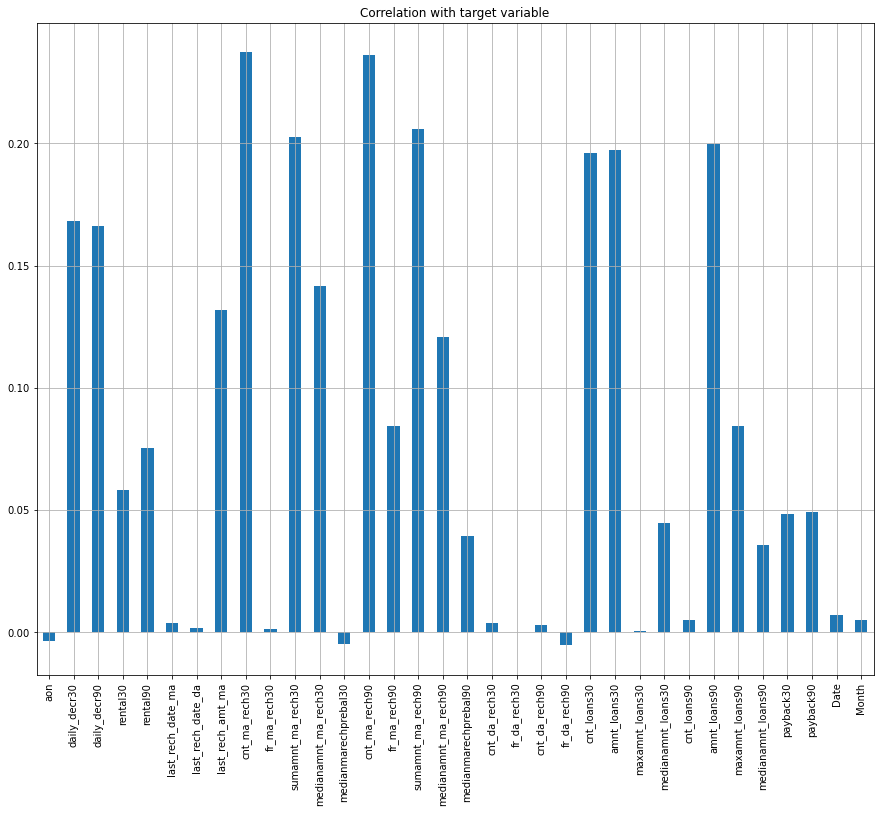

In [291]:
plt.figure(figsize=(15,12))
df.drop('label',axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.title("Correlation with target variable")

In [ ]:
#The correlaton with label is more or less uniform

<AxesSubplot:xlabel='label', ylabel='count'>

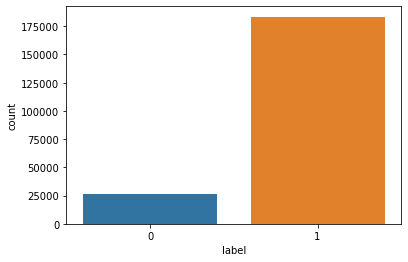

In [261]:
sns.countplot(df['label'],data=df)

In [ ]:
#Non-defaulter ratio is quite high compared to defaulters

<AxesSubplot:xlabel='label', ylabel='daily_decr30'>

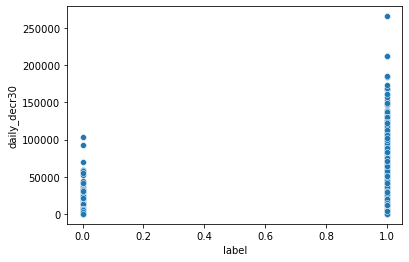

In [263]:
sns.scatterplot(x='label',y='daily_decr30',data=df)

In [ ]:
#Daily amount spent ratio is high in terms of Non-Defaulters to defaulters in time frame of 30 days

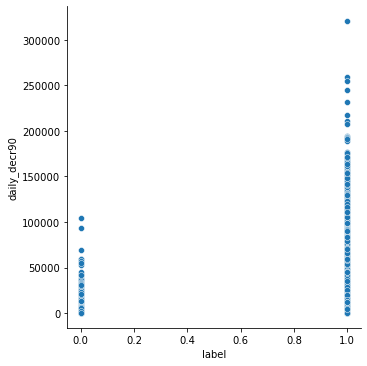

In [264]:
sns.relplot(x='label',y='daily_decr90',data=df)

In [ ]:
#Daily amount spent ratio is high interms of clients who pay-back to defaulters in a time frame of 90days

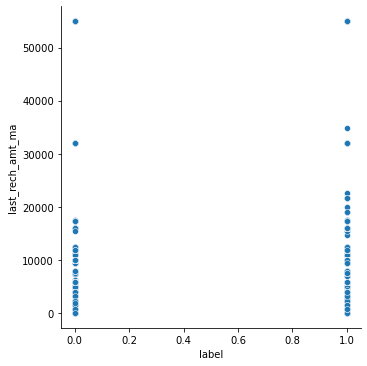

In [265]:
sns.relplot(x='label',y='last_rech_amt_ma',data=df)

In [ ]:
#Though the last amount recharge is slightly higher in terms of Non- defaulter to defaulters

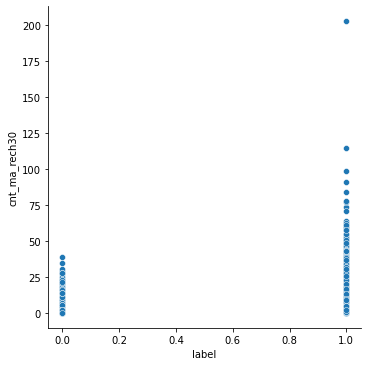

In [266]:
sns.relplot(x='label',y='cnt_ma_rech30',data=df)

In [ ]:
#No of times main bank account got recharged in 30 days is high for non-defaulters to defaulters

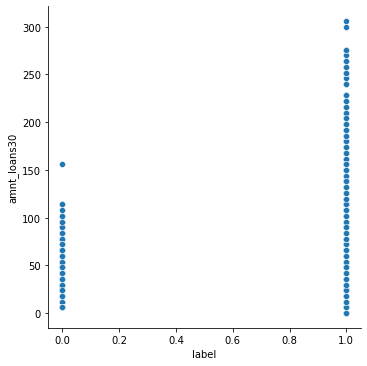

In [267]:
sns.relplot(x='label',y='amnt_loans30',data=df)

In [ ]:
#Total amount of loan taken in last 30days is high for non-defaulters to defaulters

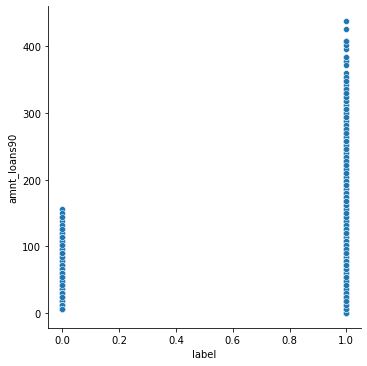

In [268]:
sns.relplot(x='label',y='amnt_loans90',data=df)

In [ ]:
#Total amount of loan taken in last 90days is high for non-defaulters to defaulters

In [269]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755200  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000       209593.00000      209593.000000   
mean     2692.581910    3483.406534         3755.84780        3712.202921   
std      4308.586781    5770.461279        53905.89223       53374.833430   
min    -23737.140000  -24720.580000          -29.00000         -29.000000   
25%       280.420000     300.260000            1.00000           0.000000   
50%      1083.570000    1334.000000            3.00000           0.000000   
75%      3356.940000    4201.790000            7.00000           0.000000   
max    198926.110000  200148.110000       998650.37770      999171.809400   

       last_rech_amt_ma  cnt_ma_rech30  ...  maxamnt_loans30  \
count     209593.000000  209593.000000  ...    209593.000000   
mean        2064.452797       3.978057  ...       274.658747   
std         2370.786034       4.256090  ...      4245.264648   
min            0.000000       0.000000  ...         0.000000   
25%          770.000000       1.000000  ...         6.000000   
50%         1539.000000       3.000000  ...         6.000000   
75%         2309.000000       5.000000  ...         6.000000   
max        55000.000000     203.000000  ...     99864.560860   

       medianamnt_loans30    cnt_loans90   amnt_loans90  maxamnt_loans90  \
count       209593.000000  209593.000000  209593.000000    209593.000000   
mean             0.054029      18.520919      23.645398         6.703134   
std              0.218039     224.797423      26.469861         2.103864   
min              0.000000       0.000000       0.000000         0.000000   
25%              0.000000       1.000000       6.000000         6.000000   
50%              0.000000       2.000000      12.000000         6.000000   
75%              0.000000       5.000000      30.000000         6.000000   
max              3.000000    4997.517944     438.000000        12.000000   

       medianamnt_loans90      payback30      payback90          Date  \
count       209593.000000  209593.000000  209593.000000  209593.00000   
mean             0.046077       3.398826       4.321485      14.39894   
std              0.200692       8.813729      10.308108       8.43890   
min              0.000000       0.000000       0.000000       1.00000   
25%              0.000000       0.000000       0.000000       7.00000   
50%              0.000000       0.000000       1.666667      14.00000   
75%              0.000000       3.750000       4.500000      21.00000   
max              3.000000     171.500000     171.500000      31.00000   

               Month  
count  209593.000000  
mean        6.612253  
std         2.371940  
min         1.000000  
25%         6.000000  
50%         7.000000  
75%         8.000000  
max        12.000000  

[8 rows x 35 columns]

In [ ]:
# There is significant difference between mean and median - so data is skewed
# Data has outliers too as the difference between 75 quartile and max is high

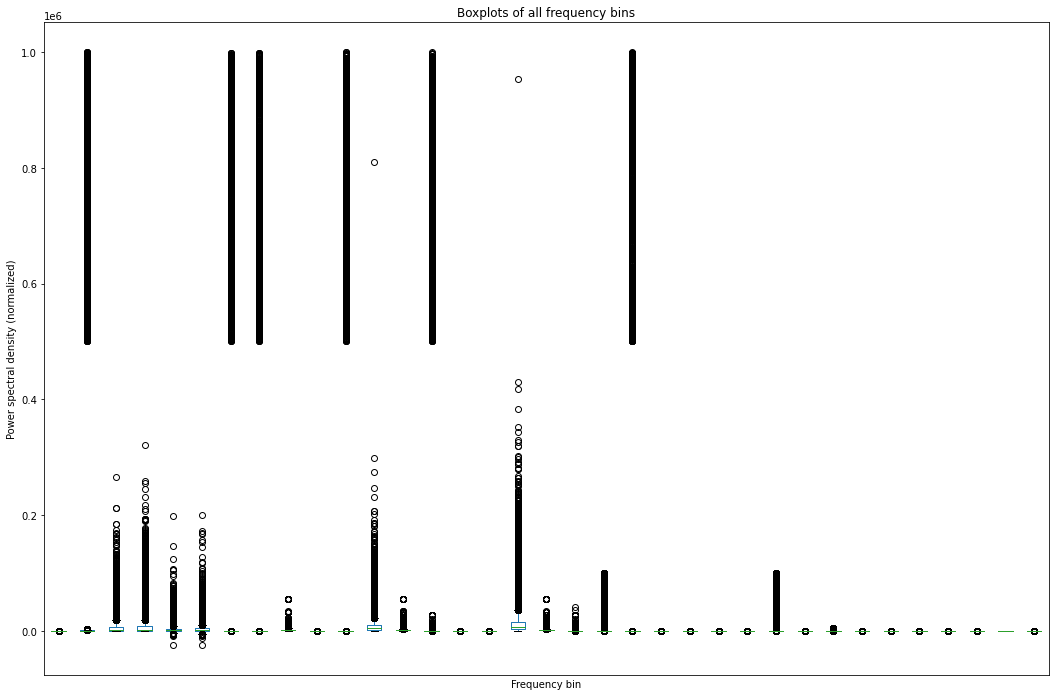

In [295]:
df.plot.box(figsize=(18,12), xticks=[])
plt.title('Boxplots of all frequency bins')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density (normalized)')
plt.show()

In [ ]:
#Almost all columns has outliers , which depicts the outliers should not be removed from the dataset

In [270]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
z.shape
df_new=df[(z<3).all(axis=1)]
print('DF_new_shape :',df_new.shape) 
print('DF_shape :',df.shape)

DF_new_shape : (161465, 35)
DF_shape : (209593, 35)


In [271]:
percentage_loss=((209593-161465)/209593*100)
percentage_loss

22.962598941758554

In [ ]:
# the percentage loss in data is also very high if outliers are removed

In [300]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

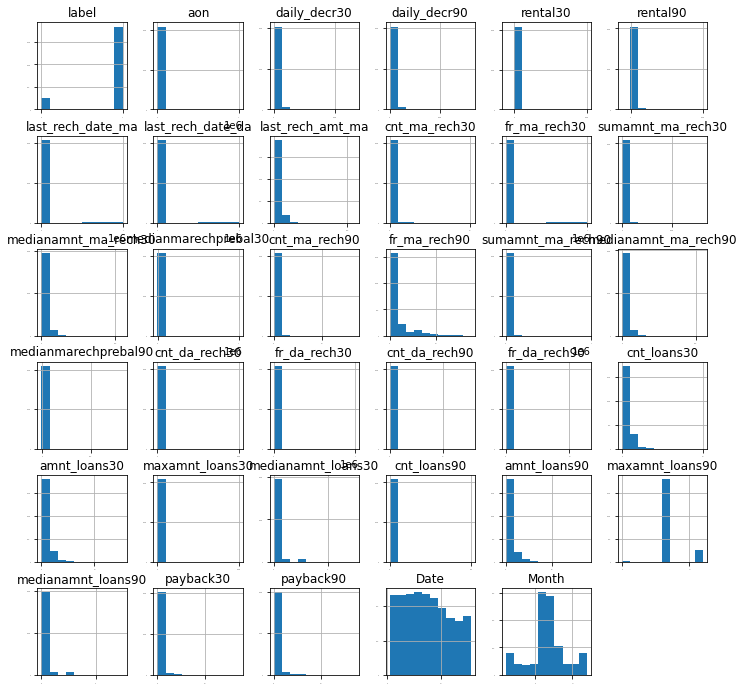

In [298]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

In [301]:
#The dataset is mostly right skewed -positively skewed

In [ ]:
#Splitting the dataset into x and y

In [274]:
x=df.drop('label',axis=1)
x.head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0  272.0   3055.050000   3065.150000    220.13    260.13                2.0   
1  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0   
2  535.0   1398.000000   1398.000000    900.13    900.13                3.0   
3  241.0     21.228000     21.228000    159.42    159.42               41.0   
4  947.0    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  ...  \
0                0.0              1539              2          21.0  ...   
1                0.0              5787              1           0.0  ...   
2                0.0              1539              1           0.0  ...   
3                0.0               947              0           0.0  ...   
4                0.0              2309              7           2.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  Date  Month  
0                6                 0.0  29.000000  29.000000    20      7  
1               12                 0.0   0.000000   0.000000    10     10  
2                6                 0.0   0.000000   0.000000    19      8  
3                6                 0.0   0.000000   0.000000     6      6  
4                6                 0.0   2.333333   2.333333    22      6  

[5 rows x 34 columns]

In [275]:
y=df['label']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [276]:
x.shape, y.shape

((209593, 34), (209593,))

In [ ]:
#Checking the shape of x and y

In [277]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [ ]:
#removing skewness

In [278]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
#scaling the dataset

In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score

In [ ]:
#importing the model to train and test the data

In [280]:
lg=LogisticRegression()



In [281]:
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"Best accuracy {accu*100} found on random state {best_rstate}")

Best accuracy 88.9477325317875 found on random state 158


In [ ]:
#The  accuracy score is found at 88 with best random state 158

In [282]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=158,stratify=y)

In [ ]:
#Train and testing the dataset at random state 158

In [283]:
print(x_train.shape,'\t\t',x_test.shape)

(167674, 34) 		 (41919, 34)


In [ ]:
#checking the shape of x train and x test

In [284]:
print(y_train.shape,'\t\t',y_test.shape)

(167674,) 		 (41919,)


In [ ]:
#checking the shape of y train and y test

In [285]:
model=[lg,GaussianNB(),DecisionTreeClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('**************************************************')
    print('\n')

Accuracy score of  LogisticRegression() is:
0.8860421288675779
[[  836  4396]
 [  381 36306]]
              precision    recall  f1-score   support

           0       0.69      0.16      0.26      5232
           1       0.89      0.99      0.94     36687

    accuracy                           0.89     41919
   macro avg       0.79      0.57      0.60     41919
weighted avg       0.87      0.89      0.85     41919

**************************************************


Accuracy score of  GaussianNB() is:
0.7348457739927002
[[ 3984  1248]
 [ 9867 26820]]
              precision    recall  f1-score   support

           0       0.29      0.76      0.42      5232
           1       0.96      0.73      0.83     36687

    accuracy                           0.73     41919
   macro avg       0.62      0.75      0.62     41919
weighted avg       0.87      0.73      0.78     41919

**************************************************


Accuracy score of  DecisionTreeClassifier() is:
0.8803645125

In [ ]:
#Both logistic regression and DecisionTreeClassifier gives good accuracy score of 88 percent

# Cross Validation Score

In [286]:
model=[lg,GaussianNB(),DecisionTreeClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('Model:',m)
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard Deviation:',score.std())
    print('**************************************************')
    print('\n')

Model: LogisticRegression()
Score: [0.88406489 0.88730916 0.88478053 0.88701751 0.88467961 0.88415478
 0.88477504 0.88444105 0.88649268 0.88544301]
Mean Score: 0.8853158253992073
Standard Deviation: 0.001137195426148851
**************************************************


Model: GaussianNB()
Score: [0.7360687  0.73249046 0.73520992 0.73519729 0.73347965 0.73853714
 0.73433847 0.73868028 0.7368195  0.73481559]
Mean Score: 0.735563701659984
Standard Deviation: 0.0019103628050778124
**************************************************


Model: DecisionTreeClassifier()
Score: [0.87967557 0.88129771 0.87633588 0.87871559 0.88057636 0.87566201
 0.8814829  0.88219858 0.87580514 0.88029009]
Mean Score: 0.8792039824936289
Standard Deviation: 0.0023322189074053094
**************************************************




In [ ]:
#logistic regression give the best cross val score -88percent

Hyper Tuning the models

In [287]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [288]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('**************************************************')
    print('\n')

Accuracy score of  RandomForestClassifier() is:
0.9211097592976931
[[ 2617  2615]
 [  692 35995]]
              precision    recall  f1-score   support

           0       0.79      0.50      0.61      5232
           1       0.93      0.98      0.96     36687

    accuracy                           0.92     41919
   macro avg       0.86      0.74      0.78     41919
weighted avg       0.91      0.92      0.91     41919

**************************************************


Accuracy score of  AdaBoostClassifier() is:
0.9079653617691261
[[ 1816  3416]
 [  442 36245]]
              precision    recall  f1-score   support

           0       0.80      0.35      0.48      5232
           1       0.91      0.99      0.95     36687

    accuracy                           0.91     41919
   macro avg       0.86      0.67      0.72     41919
weighted avg       0.90      0.91      0.89     41919

**************************************************


Accuracy score of  GradientBoostingClassifier() 

In [ ]:
#RandomForestClassifier gives the best score of 92 percent

In [289]:
gbc=GradientBoostingClassifier()

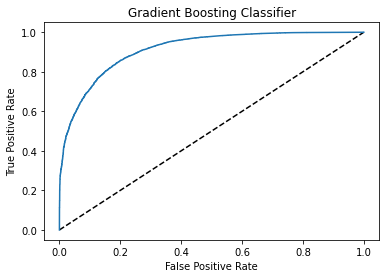

91.32770065624159


In [290]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
gbc.fit(x_train,y_train)
y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.show()

auc_score=(roc_auc_score(y_test,y_pred_prob)*100)
print(auc_score)

In [ ]:
# AUC ROC curve is giving a very good score of 91 percent which means the models are performing excellent

In [302]:
import joblib
filename='model.pkl'
joblib.dump(gbc,open(filename,'wb'))